# **Rapport sur le sujet : Prédiction des tentatives suicidaires**

Le sujet de notre étude vise à analyser un jeu de données issu d'un sondage effectué sur le subreddit Foreveralone. Il répertorie de nombreuses caractéristiques des personnes dont une indiquant si la personne a déjà effectué une tentative de suicide ou non. Notre but est d'analyser ce dataset et d'utiliser différentes méthodes de Machine Learning pour prédire les profils des personnes qui sont celles ayant le plus tendance à tenter de mettre fin à leurs jours. Sur ce, nous sommes essentiellement amenés à fournir un prédicteur h qui pour un individu donné pourrait prédire son appartenance à une des classes suivantes : 1 : tentative suicidaire, 2 : cas contraire, en se basant sur des exemples de paires entrée-sortie.





# **Choix du sujet**

On trouve parmi les raisons qui nous ont encouragés à choisir notre sujet : 

- Sujet très peu traité en Machine Learning (on traite souvent le taux de suicide) 
- Curiosité de savoir quels sont les facteurs qui poussent un individu à tenter de se suicider 
- Suite à notre étude, on pourra sensibiliser les individus sur les raisons derrière un suicide

# **Identification des tâches à réaliser**

- Analyser le dataset 
- Nettoyer le dataset 
- Choisir nos features 
- Définir les modèles 
- Implémenter les algorithmes 
- Evaluer la performance de notre étude 
- Réaliser un prédicteur

Premièrement, nous allons importer les bibliothèques dont nous aurons besoin

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from IPython.display import display
  

Nous allons lire les données à partir du fichier foreveralone.csv que nous avons déposé dans le dossier content.

In [ ]:
data_suicide = pd.read_csv('/content/foreveralone.csv',encoding = "ISO-8859-1")
data_suicide.head()

On retire les colonnes du dataset qui ne sont pas pertinentes pour la prédiction ou trop difficile à traiter.

# **L'analyse de données**

Dans cette partie, on essaie d'analyser et visuliser nos données et puis diviser notre sujet ou une substance complexe en parties plus petites afin d'en acquérir une meilleure compréhension et interprétation.

In [ ]:
data_suicide = data_suicide.drop(['time', 'pay_for_sex', 'prostitution_legal', 'job_title'], axis=1)
data_suicide.head()

In [ ]:
data_suicide.shape

In [ ]:
data_suicide.columns

On cherche si si notre dataset comporte des valeurs nulles

In [ ]:
data_suicide.isna().sum()

La façon dont a été généré ce dataset nous a obligé à éliminer certaines réponses non pertinentes.


In [ ]:
i1 = data_suicide[(data_suicide.race == 'First two answers. Gender is androgyne, not male; sexuality is asexual, not bi.')].index
i2 = data_suicide[(data_suicide.race == 'helicopterkin') ].index
data_suicide = data_suicide.drop(i1)
data_suicide = data_suicide.drop(i2)
data_suicide.shape

On change le "gender" en valeurs binaires, et les deux autres valeurs de "Transgender Male" et "Transgender Female" sont changées pour correspondre à l'un des deux.



In [ ]:
data_suicide['gender'] = data_suicide['gender'].replace({'Male':1,'Female':0, 'Transgender male':1, 'Transgender female':0})
data_suicide.head()

On procède de même avec "sexuality" en séparant "Straight" du reste.

In [ ]:
data_suicide['sexuallity'] = data_suicide['sexuallity'].replace({'Straight':1,'Bisexual':0, 'Gay/Lesbian':0})
data_suicide.head()

Pour le "income", chaque réponse possible est devenue une colonne à part entière. Chaque ligne ne présente donc qu'un unique 1 parmi ces colonnes. On renomme également ces colonnes pour qu'elles soient plus parlantes.

In [ ]:
A = pd.get_dummies(data_suicide['income'])
data_suicide = data_suicide.drop('income', axis=1)
data_suicide = pd.concat([data_suicide, A], axis=1)
data_suicide=data_suicide.rename(columns={'$0': 'income $0',
       '$1 to $10,000': 'income $1 to $10,000', '$10,000 to $19,999': 'income $10,000 to $19,999', '$100,000 to $124,999': 'income $100,000 to $124,999',
       '$125,000 to $149,999': 'income $125,000 to $149,999', '$150,000 to $174,999': 'income $150,000 to $174,999', '$174,999 to $199,999': 'income $174,999 to $199,999',
       '$20,000 to $29,999': 'income $20,000 to $29,999', '$200,000 or more': 'income $200,000 or more', '$30,000 to $39,999': 'income $30,000 to $39,999',
       '$40,000 to $49,999': 'income $40,000 to $49,999', '$50,000 to $74,999': 'income $50,000 to $74,999', '$75,000 to $99,999': 'income $75,000 to $99,999'})
data_suicide.head()

La colonne "race" contenait de nombreuses valeurs différentes et parfois incohérentes. Il a fallu en regrouper plusieurs en une seule puis les convertir en colonnes par la suite.

In [ ]:
data_suicide['race'].value_counts()
data_suicide['race'] = data_suicide['race'].replace({'half Arab':'Arab','North African':'Arab', 
                                                 'White and Native American':'White non-Hispanic', 'Native american':'White non-Hispanic',
                                                 'European':'White non-Hispanic','caucasian':'White non-Hispanic',
                                                 'Turkish':'Asian','Indian':'Asian','Middle Eastern':'Asian','Pakistani':'Asian', 'indian':'Asian',
                                                  'Mixed race':'Mixed','mixed':'Mixed','Multi':'Mixed','Mixed white/asian':'Mixed', 'Half Asian half white':'Mixed','Native American mix':'Mixed','white and asian':'Mixed'
                                                })
data_suicide['race'].value_counts()

B = pd.get_dummies(data_suicide['race'])
data_suicide = data_suicide.drop('race', axis=1)
data_suicide = pd.concat([data_suicide, B], axis=1)
data_suicide.head()


La même séparation en plusieurs colonnes pour "bodyweight".

In [ ]:
data_suicide['bodyweight'].value_counts()

C = pd.get_dummies(data_suicide['bodyweight'])
data_suicide = data_suicide.drop('bodyweight', axis=1)
data_suicide = pd.concat([data_suicide, C], axis=1)
data_suicide.head()


On convertit les "Yes" et "No" de "virgin" en 0 et 1.

In [ ]:
data_suicide['virgin'] = data_suicide['virgin'].replace({'Yes':1,'No':0})
data_suicide.head()


On nettoie la colonne "friends" en remplaçant les valeurs supérieures à 40 (qui nous paraissent aberrantes) par la valeur 40.

In [ ]:
data_suicide['friends'].values[data_suicide['friends'] > 40] = 40
data_suicide['friends'] = data_suicide['friends'].astype(int)
data_suicide.head()

On transforme de la colonne "social fear" en 0 et en 1.

In [ ]:
data_suicide['social_fear'] = data_suicide['social_fear'].map({'Yes':1,'No':0})
data_suicide.head()

On transforme de la colonne "depressed" en 0 et en 1.

In [ ]:
data_suicide['depressed'] = data_suicide['depressed'].map({'Yes':1,'No':0})
data_suicide.head()

La colonne "what_help_from_others" est difficile à traiter, mais il nous a paru pertinent de séparer les valeurs en deux colonnes : besoin d'aide et le cas contraire.

In [ ]:
data_suicide['what_help_from_others'] = data_suicide['what_help_from_others'].apply(lambda x: 0 if x == 'I don\'t want help' else 1)
data_suicide.head()

Transformation de la colonne "attempt_suicide" en 0 et en 1.

In [ ]:
data_suicide['attempt_suicide'] = data_suicide['attempt_suicide'].map({'Yes':1, 'No':0})
data_suicide.head()

On créer trois colonnes correspondant à "student", "employed" ou "not employed" à la place de la colonne "employment".

In [ ]:
def parse_values(x):
    if x == 'A student':
       return 'Student'
    elif x == 'Self-employed' or x == 'Military' or x == 'Employed for wages':
       return 'Employed'
    else:
       return 'Not employed'

data_suicide['employment'] = data_suicide['employment'].apply(parse_values)

D = pd.get_dummies(data_suicide['employment'])
data_suicide = data_suicide.drop('employment', axis=1)
data_suicide = pd.concat([data_suicide, D], axis=1)
data_suicide.head()

On créer une colonne pour chaque réponse possible dans "edu_level".

In [ ]:
data_suicide['edu_level'].value_counts()

E = pd.get_dummies(data_suicide['edu_level'])
data_suicide = data_suicide.drop('edu_level', axis=1)
data_suicide = pd.concat([data_suicide, E], axis=1)
data_suicide.head()

On sépare la colonne "improve_yourself_how" en trois : "None", "go to the gym", et "other exercise".

In [ ]:
data_suicide['improve_yourself_how'].value_counts()

def parse_values_improve_yourself_how(x):
    if x == 'None':
       return 'None'
    elif 'Joined a gym/go to the gym' in x:
       return 'go to the gym'
    else:
       return 'Other exercise'

data_suicide['improve_yourself_how'] = data_suicide['improve_yourself_how'].apply(parse_values_improve_yourself_how)

F = pd.get_dummies(data_suicide['improve_yourself_how'])
data_suicide = data_suicide.drop('improve_yourself_how', axis=1)
data_suicide = pd.concat([data_suicide, F], axis=1)
data_suicide.head()

Voici un aperçu final de notre dataset après nettoyage des données

In [ ]:
data_suicide.head()

Toutes nos colonnes sont soit des entiers ou des floats.

In [ ]:
data_suicide.dtypes

Des informations sur le dataset final

In [ ]:
print ('Notre dataset a {0} lignes et {1} colonnes'.format(data_suicide.shape[0],data_suicide.shape[1]))

In [ ]:
data_suicide.info()

In [ ]:
data_suicide.describe()

In [ ]:
import seaborn as sns
sns.distplot(data_suicide['attempt_suicide'])


On crée la matrice de corrélation de notre dataset, en ne regardant évidemment que la colonne "attempt_suicide" 

In [ ]:
data_suicide = data_suicide.rename(columns={"High school graduate, diploma or the equivalent (for example: GED)": "High school graduate, diploma or the equivalent"})
corr = data_suicide.corr()
corr.style.background_gradient(cmap='coolwarm')
import seaborn as sn
fig, ax = plt.subplots(figsize=(5,10))
sn.heatmap(corr[['attempt_suicide']], annot=True, ax=ax)

On trie les valeurs de la matrice de corrélation dans l'odre décroissant
Le premier critère qui ressort de ce tri est la dépression. Ce résultat était évidemment le plus attendu et l'étude des corrélations entre les colonnes le confirment.
En regardant tout en bas de la liste, on remarque que "sexuallity" et "gender" sont les moins corrélés aux tentatives de suicide.
Ces critères correspondent respectivement au fait d'être hétérosexuel et d'être un homme.
Cela signifie que ne pas être hétérosexuel et être une femme sont les deux caractéristiques les plus corrélées aux tentatives de suicide après la dépression.

In [ ]:
print (corr['attempt_suicide'].sort_values(ascending=False), '\n')

Notre problème va être résolu de manière automatique avec des algorithmes spécifiques et ne pourrait être résolu par le développement d'un logiciel classique. Il s'agit bien d'un problème de Machine Learning.
On peut même dire qu'il s'agit ici d'un problème de Machine Learning Supervisé étant donné que nous dispons d'un jeu de données labellisées.

On sépare notre dataset entre les features utilisées pour la prédiction et la colonne attempt_suicide qui comporte l'élément à prédire.

In [ ]:
features_columns = data_suicide.columns
features_columns = features_columns.drop('attempt_suicide')
features = data_suicide[features_columns]
target_column = 'attempt_suicide'
target = data_suicide[target_column]

On affiche du nombre d'occurences des individus ayant ou pas tenté de se suicider selon chaque feature

In [ ]:
from IPython.display import display 
for i in range(features_columns.shape[0]) :
  mat = pd.DataFrame(data_suicide.groupby([features_columns[i],target_column]).size())
  pd.DataFrame(data_suicide.groupby([features_columns[i],target_column]).size())
  mat = mat.rename(columns={0:'nombre d\'occurences'})
  display(mat)

**Analyse en composantes principales**

On applique PCA qui afin de transformer des variables liées entre elles dites « corrélées » en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales », ou axes principaux. Ça nous permet de réduire le nombre de variables et de rendre l'information moins redondante en visualisant nos données.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Séparation des features
column_names = data_suicide.columns
column_names = column_names.drop('attempt_suicide')
x = data_suicide.loc[:, column_names].values
# Séparation du but
y = data_suicide.loc[:, 'attempt_suicide'].values
# Standarisation des features
x = StandardScaler().fit_transform(x)

**La projection en 2D PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data_suicide[['attempt_suicide']]], axis = 1)

**La visualisation de la projection 2D**

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['attempt_suicide'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# **Définition du problème en tant qu'un problème de Machine Learning**

Puisque notre problème peut être résolu de manière automatique avec des algorithmes spécifiques en se basant sur l’analyse d’un jeu de données alors on peut dire que on est amené à faire du Machine Learning. N’oublions pas que le développement d’un logiciel réalisant cette même tâche est assez complexe voire impossible. 
De manière assez spécifique, notre problème est un problème d’apprentissage automatique dit “supervisé” étant donné qu’on dispose d’un jeu de données labellisées, et on est face à un problème de classification binaire puisque on possèdera des valeurs discrètes en sortie de notre prédicteur.

On importe des modules utilisés pour la classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import seaborn as sns 

On répartit nos features et targets pour préparer nos données d'entrainement

In [ ]:
features_columns = data_suicide.columns
features_columns = features_columns.drop('attempt_suicide')
features = data_suicide[features_columns]
target_column = 'attempt_suicide'
target = data_suicide[target_column]

On crée les jeux d'entrainement et de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)
print("train set shape : ", X_train.shape)
print("test set shape : ",y_train.shape)

Nous allons tester plusieurs modèles qui tenteront chacun de résoudre ce problème de Machine Learning. Pour chaque modèle, nous évaluons le score pour déterminer lesquels semblent être à première vue les plus intéressants. Les trois modèle ayant reçu les meilleurs résultats ont de plus fait l'objet d'une étude plus approfondie pour déterminer le prédicteur à utiliser.

**Le modèle de la Regression Linéaire**

Les modèles de Logistic Regression Model, Linear Discriminant Analysis et KNeighbors présentent toutes des résulats similaires, satisfaisants sans être exceptionnels. Les test set scores est assez proche des training set scores.

In [ ]:
clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(X_train, y_train) 
#print("intercept: {}".format(clf_lr.intercept_))
#print("weights:   {}".format(clf_lr.coef_))

train_score = clf_lr.score(X_train,y_train)
test_score = clf_lr.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))


In [ ]:
from sklearn.preprocessing import StandardScaler

# Séparation des features
column_names = data_suicide.columns
column_names = column_names.drop('attempt_suicide')
x = data_suicide.loc[:, column_names].values
# Séparation du but
y = data_suicide.loc[:, 'attempt_suicide'].values
# Standarisation des features
x = StandardScaler().fit_transform(x)

**Le modèle Analyse Discriminante Linéaire**

Le LDA Classifier n'a pas été aussi performant. Son training set score est très élevé mais les résultats sont beaucoup moins bons par rapport aux autres modèles.

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("Training set score: {:.2f} ".format(round(lda.score(X_train,y_train), 4)))
print("Test set score: {:.2f} ".format(round(lda.score(X_test,y_test), 4)))

**Le modèle KNeighbors**

Le KNeigbors Classifier n'a pas été aussi performant également. Les résultats sur le test set ne sont pas les meilleurs à obtenir.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
print("Training set score: {:.2f} ".format(round(neigh.score(X_train,y_train), 4)))
print("Test set score: {:.2f} ".format(round(neigh.score(X_test,y_test), 4)))

**Le modèle Decision Tree**

Le Decision Tree Classifier n'a pas été aussi performant. Son training set score est très élevé mais les résultats sont beaucoup moins bons sur le test set.

In [ ]:
my_tree = tree.DecisionTreeClassifier()
my_tree.fit(X_train, y_train)

train_score = my_tree.score(X_train,y_train)
test_score = my_tree.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

**Le modèle GaussianNB**

Le Bayesien naïf a été le seul modèle réellement mauvais parmis ceux que nous avons testés. Ces résultats sont de 0.25 pour les deux sets.

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

train_score = gaussian.score(X_train,y_train)
test_score = gaussian.score(X_test,y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))

**Le modèle SVC**

Pour le modèle SVC qui nous a paru intéressant à étudier de plus près, nous avons testé différents hyper paramètres pour déterminer un prédicteur optimal avec cette méthode. Ici les résultats sont identiques avec "precision" et "recall". On obtient au mieux un test set score de 0,82.

In [ ]:
svc = svm.SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Réglage des hyper-parameters pour %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Les meilleurs paramètres trouvés : ")
    print()
    print(clf.best_params_)
    print()
    print("Scores du grid :")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) pour %r"
              % (mean, std * 2, params))
    print()

    print("Rapport détaillé :")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

print("Test set score: {:.2f} ".format(round(svc.score(X_test,y_test), 4)))
print("Training set score: {:.2f} ".format(round(svc.score(X_train,y_train), 4)))

# Réglage des hyper-parameters pour precision



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

**Le modèle RandomForest**

Nous avons également étudié de plus près de modèle de Random Forest. Ici, "recall" s'est montré légèrement plus performant. Il nous permet alors d'atteindre un test set score de 0,84.

In [ ]:
rf = RandomForestClassifier(max_depth=10,min_samples_split=2)
rf.fit(X_train, y_train)

param_grid = {'max_depth': [3, 5, 10],
             'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier()

scores = ['precision', 'recall']

for score in scores:
    print("# Réglage des hyper-parameters pour %s" % score)
    print()

    clf = GridSearchCV(
        base_estimator, param_grid, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Les meilleurs paramètres trouvés : ")
    print()
    print(clf.best_params_)
    print()
    print("Scores du grid :")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) pour %r"
              % (mean, std * 2, params))
    print()

    print("Rapport détaillé :")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

print("Test set score: {:.2f} ".format(round(rf.score(X_test,y_test), 4)))
print("Training set score: {:.2f} ".format(round(rf.score(X_train,y_train), 4)))

# Réglage des hyper-parameters pour precision



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Les meilleurs paramètres trouvés : 

{'max_depth': 10, 'min_samples_split': 2}

Scores du grid :

0.407 (+/-0.007) pour {'max_depth': 3, 'min_samples_split': 2}
0.407 (+/-0.007) pour {'max_depth': 3, 'min_samples_split': 5}
0.407 (+/-0.007) pour {'max_depth': 3, 'min_samples_split': 10}
0.407 (+/-0.007) pour {'max_depth': 5, 'min_samples_split': 2}
0.407 (+/-0.007) pour {'max_depth': 5, 'min_samples_split': 5}
0.407 (+/-0.007) pour {'max_depth': 5, 'min_samples_split': 10}
0.559 (+/-0.405) pour {'max_depth': 10, 'min_samples_split': 2}
0.508 (+/-0.402) pour {'max_depth': 10, 'min_samples_split': 5}
0.508 (+/-0.401) pour {'max_depth': 10, 'min_samples_split': 10}

Rapport détaillé :
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       129
           1       0.75      0.12      0.20        26

    accuracy                           0.85       155
   macro avg       0.80      0.55      0.56       155
weighted avg       0.83      0.85    

**Le modèle Perceptron**

Le modèle du Perceptron a montré de nombreuses instabilité avec des résultats très variables. Nous avons donc décidé d'abandonner le modèle.

In [ ]:
p = Perceptron(tol=1e-3, random_state=0)
p.fit(X_train, y_train)
print("Test set score: {:.2f} ".format(round(p.score(X_test,y_test), 4)))
print("Training set score: {:.2f} ".format(round(p.score(X_train,y_train), 4)))

Test set score: 0.85 
Training set score: 0.82 


**Le modèle MLP**

Nous avons également étudié le MLPClassifier, et cette fois si "precision" semblait être plus pertinent. Nous avons même réussi à atteindre un test set score de 0,98, plus élevé que sur le training set.

In [ ]:
mlp = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50), solver='adam')
mlp.fit(X_train, y_train)

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],}
base_estimator = MLPClassifier()

scores = ['precision', 'recall']

for score in scores:
    print("# Réglage des hyper-parameters pour %s" % score)
    print()

    clf = GridSearchCV(
        base_estimator, param_grid, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Les meilleurs paramètres trouvés : ")
    print()
    print(clf.best_params_)
    print()
    print("Scores du grid :")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) pour %r"
              % (mean, std * 2, params))
    print()

    print("Rapport détaillé :")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

print("Test set score: {:.2f} ".format(round(mlp.score(X_train,y_train), 4)))
print("Training set score: {:.2f} ".format(round(mlp.score(X_test,y_test), 4)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Réglage des hyper-parameters pour precision



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

Les meilleurs paramètres trouvés : 

{'alpha': 0.05, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Scores du grid :

0.407 (+/-0.007) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.660 (+/-0.285) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.407 (+/-0.007) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'sgd'}
0.653 (+/-0.160) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'adam'}
0.407 (+/-0.007) pour {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
0.581 (+/-0.381) pour {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
0.407 (+/-0.007) pour {'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.634 (+/-0.207) pour {'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.407 (+/-0.007) pour {'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'sgd'}
0.593 (+/-0.212) pour {'alpha': 0.05, 'hidden_layer_si

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Les meilleurs paramètres trouvés : 

{'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}

Scores du grid :

0.500 (+/-0.000) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.550 (+/-0.073) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.500 (+/-0.000) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'sgd'}
0.545 (+/-0.079) pour {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'adam'}
0.500 (+/-0.000) pour {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
0.563 (+/-0.057) pour {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
0.500 (+/-0.000) pour {'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.567 (+/-0.052) pour {'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.500 (+/-0.000) pour {'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'sgd'}
0.556 (+/-0.128) pour {'alpha': 0.05, 'hidden_la

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nous avons effectué une comparaisons de tous les modèles testés avec une validation croisée. Nous avons pris le résultat médian pour chacun des modèles pour observer lesquels sont les plus performants de manière stable. Cependant, à quelques rares exceptions près, tous les modèles donnent de résultats similaires avec un score médian compris entre 0,78 et 0,83.

In [ ]:

seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('P', Perceptron()))
models.append(('MLP', MLPClassifier()))

results = []
medians = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, features, target, cv=kfold, scoring=scoring)
	results.append(cv_results)
 
for i in range(len(results)):
  medians.append(np.median(results[i]))

liste = ['LR', 'LDA', 'KNN', 'DTC', 'GNB', 'SVC', 'RF', 'P', 'MLP']

i = 0
for methode in liste:
  print("median de la methode ", methode, "est : ", medians[i])
  i = i + 1 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

# **Les prédicteurs**

Pour le choix des prédicteurs qu'on va livrer en fin de cette étude, on cite les 3 meilleurs modèles pour ce jeu de données :
*   SVC
*   RandomForest
*   MLP



On a choisi la matrice de confusion comme repère pour nous guider quel prédicteur est meilleur par rapport aux autres.
Cette matrice mesure la qualité d'un système de classification. 
Chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée.

Comme on le voit dans une matrice de confusion, chaque composant représente un scénario différent et 
peut être interprété différemment pour dériver des mesures autres que la précision. 
Les plus courants sont la précision , le rappel, le score F1 et le support.

La précision est utilisée pour mesurer les modèles positifs qui sont correctement prédits à partir du total des modèles prédits dans une classe positive.

Le rappel est utilisée pour mesurer la fraction des positifs motifs qui sont correctement classés.

Score F1 cette métrique représente la moyenne harmonique entre les valeurs de rappel et de précision , parfois également appelée mesure F.

Le support est le nombre d'échantillons de la vraie réponse qui se trouvent dans cette classe.

L'erreur absolue moyenne (EAM ou MAE pour Mean Absolute Error) : moyenne arithmétique des valeurs absolues des écarts.

Le carré moyen des erreurs (MSE pour Mean Square Error ou MCE pour moyenne des carrés des erreurs) : c’est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations.

L’erreur quadratique moyenne (RMSE) : racine carrée du précédent.

Les poids du class_weight paramètre sont utilisés pour entraîner le classificateur . Ils ne sont utilisés dans le calcul d'aucune des métriques qu'on utilise : avec des poids de classe différents, les nombres seront différents simplement parce que le classificateur est différent.

Fondamentalement, dans chaque classificateur scikit-learn, les poids de classe sont utilisés pour indiquer à notre modèle l'importance d'une classe. Cela signifie que pendant la formation, le classificateur fera des efforts supplémentaires pour classer correctement les classes avec des poids élevés.

Habituellement, lorsque la distribution des classes est déséquilibrée, la précision est considérée comme un mauvais choix car elle donne des scores élevés aux modèles qui ne font que prédire la classe la plus fréquente.

**Le prédicteur SVC**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


     Actual  Predicted
366       0          0
324       0          0
126       0          0
208       0          0
446       0          0
..      ...        ...
18        1          0
286       0          0
216       0          0
417       0          0
59        0          0

[155 rows x 2 columns]
[[128   1]
 [ 23   3]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       129
           1       0.75      0.12      0.20        26

    accuracy                           0.85       155
   macro avg       0.80      0.55      0.56       155
weighted avg       0.83      0.85      0.79       155

0.8451612903225807
Mean Absolute Error: 0.15483870967741936
Mean Squared Error: 0.15483870967741936
Root Mean Squared Error: 0.39349550147037177


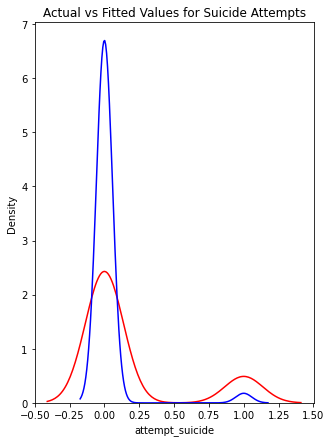

In [ ]:
def predictor_SVC(xx,yy):
  y_pred = svc.predict(xx)
  cp=pd.DataFrame({'Actual': yy, 'Predicted': y_pred})
  print(cp) 
  print(confusion_matrix(yy,y_pred))
  print(classification_report(yy,y_pred))
  print(accuracy_score(yy, y_pred))
  print('Mean Absolute Error:', metrics.mean_absolute_error(yy, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(yy, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy, y_pred)))

  plt.figure(figsize=(5, 7))


  ax = sns.distplot(yy, hist=False, color="r", label="Actual Value")
  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


  plt.title('Actual vs Fitted Values for Suicide Attempts')


  plt.show()
  plt.close()
predictor_SVC(X_test,y_test)


**Le prédicteur RandomForest**

In [ ]:
def predictor_RF(xx,yy):
  y_pred = rf.predict(xx)
  cp=pd.DataFrame({'Actual': yy, 'Predicted': y_pred})
  print(cp) 
  print(confusion_matrix(yy,y_pred))
  print(classification_report(yy,y_pred))
  print(accuracy_score(yy, y_pred))
  print('Mean Absolute Error:', metrics.mean_absolute_error(yy, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(yy, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy, y_pred)))

  plt.figure(figsize=(5, 7))


  ax = sns.distplot(yy, hist=False, color="r", label="Actual Value")
  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


  plt.title('Actual vs Fitted Values for Suicide Attempts')


  plt.show()
  plt.close()
predictor_RF(X_test,y_test)


**Le prédicteur MLP**

In [ ]:
def predictor_MLP(xx,yy):
  y_pred = mlp.predict(xx)
  cp=pd.DataFrame({'Actual': yy, 'Predicted': y_pred})
  print(cp) 
  print(confusion_matrix(yy,y_pred))
  print(classification_report(yy,y_pred))
  print(accuracy_score(yy, y_pred))
  print('Mean Absolute Error:', metrics.mean_absolute_error(yy, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(yy, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy, y_pred)))

  plt.figure(figsize=(5, 7))


  ax = sns.distplot(yy, hist=False, color="r", label="Actual Value")
  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


  plt.title('Actual vs Fitted Values for Suicide Attempts')


  plt.show()
  plt.close()
predictor_MLP(X_test,y_test)

Enfin pour les trois méthodes que nous avons retenues, nous avons calculé les Mean Absolute Errors et Mean Squared Errors et affiché les densités prédites pour les comparer aux densités réelles sur le test set.
Les résultats varient légèrement d'une exécution à une autre, mais on remarque que les erreurs sont assez similaires pour chaque modèle. Cependant, la courbe de prédiction pour le prédicteur MLP se rapproche nettement plus de la courbe réelle, et nous recommandons donc l'utilisation de ce prédicteur pour la résolution de ce problème.